In [2]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
ALPHA=0.01
EPOCH=1000

In [3]:
class Perceptron_Layer:
  def __init__(self,init_w,init_b):
      self.w=tf.Variable(init_w,dtype='float64')
      self.b=tf.Variable(init_b,dtype='float64')
  
  def compute(self,x):
    result= tf.sigmoid(tf.matmul(x,self.w)+self.b) #n*2, 2*2
    return result

In [4]:
X=np.array([[1,3],[-2,-2]]).astype('float64') #n*2
Y=np.array([[0,1],[1,0]]).astype('float64')

In [5]:
w1=np.array([[1,2],[-2,0]]).astype('float64')
b1=np.array([3,-1]).astype('float64')

w2=np.array([[1,1],[0,-2]]).astype('float64')
b2=np.array([-2,3]).astype('float64')

In [6]:
p1=Perceptron_Layer(w1,b1)
p2=Perceptron_Layer(w2,b2)

In [7]:
V=p1.compute(X)
print(V)
output=p2.compute(V)
print(output)

tf.Tensor(
[[0.11920292 0.73105858]
 [0.99330715 0.00669285]], shape=(2, 2), dtype=float64)
tf.Tensor(
[[0.13229735 0.83984641]
 [0.26762756 0.98165569]], shape=(2, 2), dtype=float64)


In [8]:
def p_cost(output,target):
  diff=output-target
  diff=tf.reduce_sum(diff*diff)
  return diff/len(output)

In [9]:
print(p_cost(output,Y))

tf.Tensor(0.7715845238082222, shape=(), dtype=float64)


Cost function: J=∑(d-y)^2

Y=f(U)

U=HW2+B2 (second layer)

H=g(z)

Z=XW1+B1(first layer)


---

Using the knowledge above, 

∇uJ=diag(f'(U))∇yJ=f'(U)·∇yJ=f'(U)·(D-Y)

∇w2J=(∂u/∂w2)∇ uJ=H'∇uJ, ∇b2J=(∂u/∂b2)∇uJ=∇uJ

∇hJ=(∂u/∂h)∇uJ=∇uJW2'

∇zJ=(∂h/∂z)∇hJ=diag(g'(z))∇hJ

∇w1J=(∂z/∂w1)∇zJ=X'∇zJ, ∇wbJ=(∂z/∂b1)∇zJ=∇zJ

In [10]:
def train(layer1,layer2,input,target):
  h=layer1.compute(input) #n*2
  y=layer2.compute(h) #n*2

  f_prime=(1-y)*y #n*2
  delta_u=(y-target)*f_prime  #n*2

  delta_w2=tf.matmul(tf.transpose(h),delta_u) #2*n,n*2
  delta_b2=tf.reshape(tf.matmul(np.ones([1,delta_u.shape[0]]),delta_u),[2]) #1*n,n*2

  g_prime=(1-h)*h
  delta_h=tf.matmul(delta_u,tf.transpose(layer2.w)) #n*2, 2*2
  delta_z=delta_h*g_prime #n*2
  delta_w1=tf.matmul(tf.transpose(input),delta_z) #2*n,n*2
  delta_b1=tf.reshape(tf.matmul(np.ones([1,delta_z.shape[0]]),delta_z),[2]) #1*n, n*2

  layer1.w.assign_sub(delta_w1*ALPHA)
  layer1.b.assign_sub(delta_b1*ALPHA)
  layer2.w.assign_sub(delta_w2*ALPHA)
  layer2.b.assign_sub(delta_b2*ALPHA)

  return layer1,layer2


In [11]:
p1=Perceptron_Layer(w1,b1)
p2=Perceptron_Layer(w2,b2)
p1,p2=train(p1,p2,X,Y)
output=p2.compute(p1.compute(X))
print("cost: ",p_cost(output,Y))

cost:  tf.Tensor(0.7712074279235315, shape=(), dtype=float64)


In [12]:
p1=Perceptron_Layer(w1,b1)
p2=Perceptron_Layer(w2,b2)
loss=[]
for i in range(EPOCH):
  p1,p2=train(p1,p2,X,Y)
  output=p2.compute(p1.compute(X))
  loss.append(p_cost(output,Y))
  if i%100==0:
    print("cost: ",p_cost(output,Y))

cost:  tf.Tensor(0.7712074279235315, shape=(), dtype=float64)
cost:  tf.Tensor(0.7325363834509875, shape=(), dtype=float64)
cost:  tf.Tensor(0.6944867481111542, shape=(), dtype=float64)
cost:  tf.Tensor(0.6606449095279749, shape=(), dtype=float64)
cost:  tf.Tensor(0.6330194087679388, shape=(), dtype=float64)
cost:  tf.Tensor(0.611658180502722, shape=(), dtype=float64)
cost:  tf.Tensor(0.5954743573775207, shape=(), dtype=float64)
cost:  tf.Tensor(0.5831430512248147, shape=(), dtype=float64)
cost:  tf.Tensor(0.5735436751262605, shape=(), dtype=float64)
cost:  tf.Tensor(0.5658546777076815, shape=(), dtype=float64)


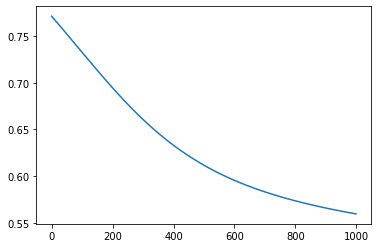

In [13]:
plt.plot([i for i in range(EPOCH)],loss)

In [14]:
print(f"layer1 weight:{p1.w.numpy()}, layer1 bias:{p1.b.numpy()}")
print(f"layer2 weight:{p2.w.numpy()}, layer2 bias:{p2.b.numpy()}")

layer1 weight:[[ 0.9469426   1.93125627]
 [-2.12302005 -0.19611701]], layer1 bias:[ 2.97405672 -1.0611581 ]
layer2 weight:[[ 2.06466068  0.82573569]
 [-0.19742227 -1.89509776]], layer2 bias:[-1.22279351  2.97108419]


Now for classificaton

In [40]:
X = np.array([[1.0, 1.0], [0.0, 1.0], [3.0, 4.0], [2.0, 2.0], [2.0, -2.0], [-2.0, -3.0]]).astype('float64')
Y = np.array([0, 0, 1, 1, 2, 2]).astype('int')
K = np.array([[1, 0, 0],
              [1, 0, 0],
              [0, 1, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 0, 1]]).astype('float64')

Create the network

In [21]:
class NN:
  def __init__(self,w1,b1,w2,b2):
    self.w1=tf.Variable(w1,dtype='float64')
    self.b1=tf.Variable(b1,dtype='float64')
    self.w2=tf.Variable(w2,dtype='float64')
    self.b2=tf.Variable(b2,dtype='float64')

  def compute(self,input):
    z=tf.matmul(input,self.w1)+self.b1
    g_z=tf.sigmoid(z)
    u=tf.matmul(g_z,self.w2)+self.b2
    f_u=tf.sigmoid(u)
    y=tf.argmax(f_u,axis=1)
    return z,g_z,u,f_u,y

In [22]:
w1 = np.array([[-0.10, 0.97, 0.18], [-0.70, 0.38, 0.93]]).astype('float64')
b1 =np.array([0.0, 0.0, 0.0]).astype('float64')
w2 = np.array([[1.01, 0.09, -0.39],
          [0.79, -0.45, -0.22],
          [0.28, 0.96, -0.07]]).astype('float64')
b2 = np.array([0.0, 0.0, 0.0]).astype('float64')

Test

In [37]:
net=NN(w1,b1,w2,b2)

In [38]:
z,g_z,u,f_u,output=net.compute(X)

define cost

In [52]:
def error(output,target):
  return tf.reduce_sum(tf.cast(tf.not_equal(output,target),tf.int32))

def cost(output,target):
  return tf.reduce_sum(tf.math.log(output)*target)

In [54]:
print(f"error: {error(output,Y)}, loss: {cost(f_u,K)}")

error: 4, loss: -3.4037562994095407


Train

In [65]:
def train(net,input,k,y):
  z,g_z,u,f_u,output=net.compute(input)

  delta_u=(f_u-k)

  delta_w2=tf.matmul(tf.transpose(g_z),delta_u) #2*n,n*2
  delta_b2=tf.reduce_sum(delta_u, axis=0)

  g_prime=(1-g_z)*g_z
  delta_h=tf.matmul(delta_u,tf.transpose(net.w2)) #n*2, 2*2
  delta_z=delta_h*g_prime #n*2
  delta_w1=tf.matmul(tf.transpose(input),delta_z) #2*n,n*2
  delta_b1=tf.reduce_sum(delta_z, axis=0)

  net.w1.assign_sub(delta_w1*ALPHA)
  net.b1.assign_sub(delta_b1*ALPHA)
  net.w2.assign_sub(delta_w2*ALPHA)
  net.b2.assign_sub(delta_b2*ALPHA)

  return net

In [67]:
loss=[]
e=[]
net=NN(w1,b1,w2,b2)
for i in range(EPOCH):
  net=train(net,X,K,Y)
  z,g_z,u,f_u,output=net.compute(X)
  e.append(error(output,Y))
  loss.append(cost(f_u,K))

  if i%100==0:
    print(f"error: {error(output,Y)}, loss: {cost(f_u,K)}")


error: 4, loss: -3.451152028868561
error: 2, loss: -4.855693509529206
error: 2, loss: -4.045397430013556
error: 1, loss: -3.4725275024046627
error: 0, loss: -3.1508964574850555
error: 0, loss: -2.9288311297889944
error: 0, loss: -2.7390938540772685
error: 0, loss: -2.556742218450096
error: 0, loss: -2.3756204126011062
error: 0, loss: -2.1976487885887552


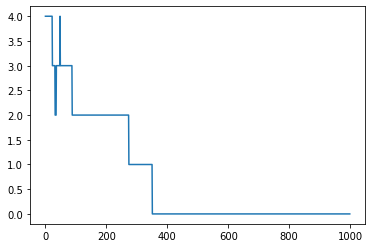

In [68]:
plt.plot([i for i in range(EPOCH)],e)

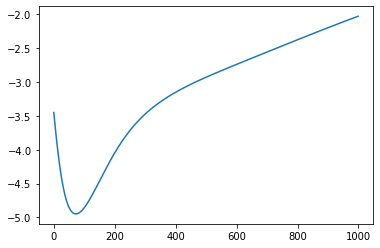

In [69]:
plt.plot([i for i in range(EPOCH)],loss)

Approximate0.8𝑥^2−𝑦^3+2.5𝑥𝑦

In [55]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [58]:
BATCH_SIZE = 64
LR = 0.01
EPOCH = 1000
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [56]:
X = np.zeros((9*9, 2)).astype(np.float32)
p = 0
for i in np.arange(-1, 1.001, 0.25):
    for j in np.arange(-1, 1.001, 0.25):
        X[p] = [i, j]
        p += 1

np.random.shuffle(X)
Y = np.zeros((9*9, 1)).astype(np.float32)
Y[:,0] = 0.8*X[:,0]**2 - X[:,1]**3 + 2.5*X[:,0]*X[:,1]

In [57]:
print(X)
print(Y)

[[ 0.75 -0.25]
 [-0.25 -1.  ]
 [ 0.25 -0.75]
 [-1.    0.25]
 [ 0.5   1.  ]
 [-0.5  -0.5 ]
 [-0.75 -0.75]
 [ 0.    0.5 ]
 [-0.75  0.25]
 [ 0.   -0.25]
 [ 0.25  0.75]
 [ 0.75 -0.5 ]
 [-1.   -1.  ]
 [-0.25  0.75]
 [-0.75  0.  ]
 [ 0.75  0.25]
 [-0.25 -0.5 ]
 [ 0.25 -0.25]
 [ 0.75 -0.75]
 [ 0.75  0.5 ]
 [ 1.    0.  ]
 [ 0.75  0.75]
 [ 0.    0.75]
 [ 1.    0.75]
 [ 0.    0.  ]
 [-1.    0.75]
 [-0.25  0.5 ]
 [ 1.   -0.25]
 [-0.75 -0.5 ]
 [ 1.    0.5 ]
 [-0.25  0.25]
 [-0.25 -0.25]
 [-0.5   0.5 ]
 [-1.   -0.75]
 [-0.75 -1.  ]
 [ 0.25  1.  ]
 [ 0.   -0.75]
 [-0.5   0.75]
 [-0.25  0.  ]
 [-0.25  1.  ]
 [-0.5   0.  ]
 [-1.   -0.25]
 [-1.   -0.5 ]
 [ 0.    0.25]
 [ 0.   -0.5 ]
 [-0.25 -0.75]
 [-0.75  0.5 ]
 [ 0.75  1.  ]
 [ 0.25 -0.5 ]
 [ 0.5  -0.25]
 [ 1.   -1.  ]
 [ 0.25 -1.  ]
 [ 0.   -1.  ]
 [ 1.   -0.75]
 [ 0.25  0.25]
 [ 0.    1.  ]
 [ 0.5  -0.75]
 [-0.5   0.25]
 [-0.5  -1.  ]
 [ 0.5   0.75]
 [-1.    1.  ]
 [-0.5   1.  ]
 [ 1.    0.25]
 [-0.5  -0.75]
 [ 0.25  0.5 ]
 [ 0.5  -0.5 ]
 [ 1.   -0

In [60]:
X=torch.from_numpy(X)
Y=torch.reshape(torch.from_numpy(Y),[X.shape[0],1])
dataset = TensorDataset(X,Y)
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

Take a look at the data

In [62]:
for input,output in train_loader:
  print(input)
  print(output)

tensor([[ 1.0000,  0.0000],
        [ 0.2500, -0.5000],
        [ 0.5000,  0.7500],
        [ 0.2500, -1.0000],
        [ 0.7500, -0.2500],
        [ 1.0000,  0.7500],
        [ 0.2500, -0.7500],
        [-0.5000,  0.5000],
        [-1.0000,  0.7500],
        [-1.0000, -1.0000],
        [-0.2500, -0.5000],
        [ 1.0000,  0.2500],
        [-0.5000, -0.7500],
        [ 0.5000, -0.2500],
        [ 0.7500,  0.2500],
        [-0.2500,  1.0000],
        [ 1.0000, -1.0000],
        [-0.7500, -0.2500],
        [-0.7500,  0.2500],
        [-0.7500, -0.7500],
        [ 0.5000,  1.0000],
        [-0.2500, -0.7500],
        [ 0.7500,  1.0000],
        [ 0.2500, -0.2500],
        [ 0.0000, -0.7500],
        [ 0.0000, -0.2500],
        [-0.2500,  0.5000],
        [ 0.5000, -0.7500],
        [-0.7500,  1.0000],
        [-0.5000,  1.0000],
        [ 0.7500,  0.5000],
        [-1.0000, -0.2500],
        [ 0.0000,  0.5000],
        [-1.0000,  0.2500],
        [-0.5000,  0.7500],
        [-1.0000,  0

Define the net

In [63]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1=nn.Linear(2,10) 
        self.linear2=nn.Linear(10,5)
        self.linear3=nn.Linear(5,1)

    def forward(self, x):
        x= F.relu(self.linear1(x))
        x= F.relu(self.linear2(x))
        x=self.linear3(x)
        return x

In [64]:
net=NeuralNetwork().to(device)

Take a look at the initial parameters

In [65]:
params = list(net.parameters())
params

[Parameter containing:
 tensor([[ 0.0355,  0.5819],
         [ 0.5716,  0.3460],
         [ 0.0921, -0.3722],
         [-0.3364, -0.4761],
         [-0.3786, -0.2126],
         [-0.5829, -0.5126],
         [ 0.4773, -0.1174],
         [-0.5874, -0.3390],
         [-0.4606, -0.5013],
         [-0.7067,  0.2767]], requires_grad=True), Parameter containing:
 tensor([-0.1584, -0.4480,  0.6921, -0.4626,  0.5341, -0.6572, -0.0047, -0.1276,
          0.1525,  0.1654], requires_grad=True), Parameter containing:
 tensor([[ 0.1305,  0.2594, -0.2086, -0.2095, -0.2435, -0.3140, -0.2240, -0.2531,
          -0.3099, -0.1109],
         [-0.0748,  0.2143,  0.3115, -0.1797,  0.2164, -0.2580,  0.2874, -0.1686,
           0.1796,  0.2159],
         [ 0.2970,  0.0632,  0.2265, -0.2217,  0.0707,  0.2606, -0.0764, -0.1187,
           0.2651,  0.3099],
         [ 0.2157,  0.0089,  0.1797, -0.1523, -0.0917, -0.2675, -0.0729,  0.1437,
          -0.1585,  0.0083],
         [-0.2330,  0.0769, -0.0968, -0.2480,  

Test the output by inputing entire X

In [66]:
result=net(X)
result

tensor([[0.0427],
        [0.0563],
        [0.0432],
        [0.0764],
        [0.0369],
        [0.0633],
        [0.0875],
        [0.0380],
        [0.0596],
        [0.0459],
        [0.0369],
        [0.0391],
        [0.1144],
        [0.0389],
        [0.0664],
        [0.0415],
        [0.0562],
        [0.0480],
        [0.0303],
        [0.0404],
        [0.0351],
        [0.0392],
        [0.0293],
        [0.0357],
        [0.0442],
        [0.0785],
        [0.0312],
        [0.0340],
        [0.0805],
        [0.0346],
        [0.0361],
        [0.0500],
        [0.0433],
        [0.1074],
        [0.0946],
        [0.0330],
        [0.0549],
        [0.0491],
        [0.0438],
        [0.0521],
        [0.0496],
        [0.0929],
        [0.1003],
        [0.0465],
        [0.0511],
        [0.0624],
        [0.0596],
        [0.0380],
        [0.0383],
        [0.0484],
        [0.0352],
        [0.0472],
        [0.0567],
        [0.0360],
        [0.0550],
        [0

define 1 training step

In [71]:
def train(net,train_loader):
  net.train()
  for input,target in train_loader:
    optimizer.zero_grad()
    output = net(input)
    criterion = nn.MSELoss()
    loss=criterion(output,target)
    loss.backward()
    optimizer.step()


In [72]:
net=NeuralNetwork().to(device)
optimizer = optim.SGD(net.parameters(), lr=LR)
all_loss=[]
for i in range(1000):
  train(net,train_loader)
  criterion=nn.MSELoss()
  loss=criterion(net(X),Y).item()
  all_loss.append(loss)
  if i%100==0:
      print(f"Loss: {loss}")



Loss: 1.7292414903640747
Loss: 1.3844482898712158
Loss: 1.0918974876403809
Loss: 0.6461411118507385
Loss: 0.34307605028152466
Loss: 0.20292599499225616
Loss: 0.15777252614498138
Loss: 0.13458271324634552
Loss: 0.1196688637137413
Loss: 0.10869965702295303


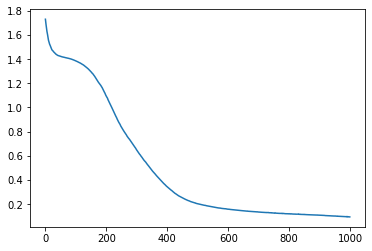

In [73]:
plt.plot([i for i in range(EPOCH)],all_loss)